In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

f = pd.read_csv("Black Friday Sales.csv")
f.shape
f.head()
f.info()
f.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  str    
 2   Gender                      550068 non-null  str    
 3   Age                         550068 non-null  str    
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  str    
 6   Stay_In_Current_City_Years  550068 non-null  str    
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), str(5)
memory usage: 50.4 MB


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<Axes: xlabel='Purchase', ylabel='Count'>

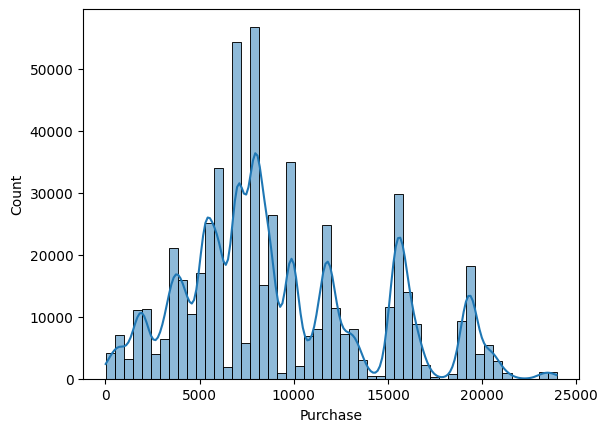

In [2]:
#Distribution of Purchase Amount. Look for:
#Skewness (long tail?)
#Outliers
#Typical purchase range
#This helps understand spending behavior.

sns.histplot(f["Purchase"], bins=50, kde=True)

<Axes: xlabel='Gender'>

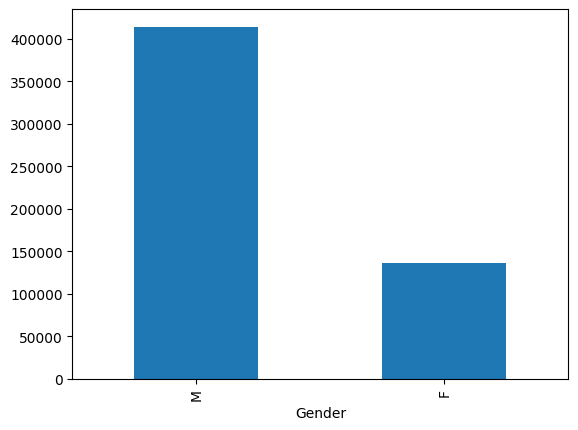

In [3]:
#Category Frequencies
#Look at: Dominant age groups, Male vs female customer proportions, Most common city categories

f["Gender"].value_counts().plot(kind="bar")

<Axes: xlabel='Age'>

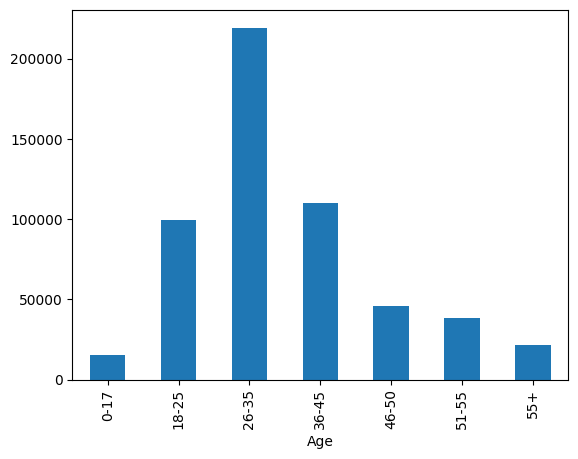

In [4]:
f["Age"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='City_Category'>

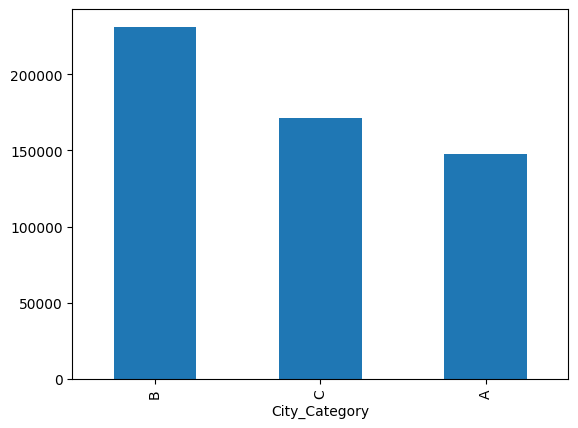

In [5]:
f["City_Category"].value_counts().plot(kind="bar")

<Axes: xlabel='Gender', ylabel='Purchase'>

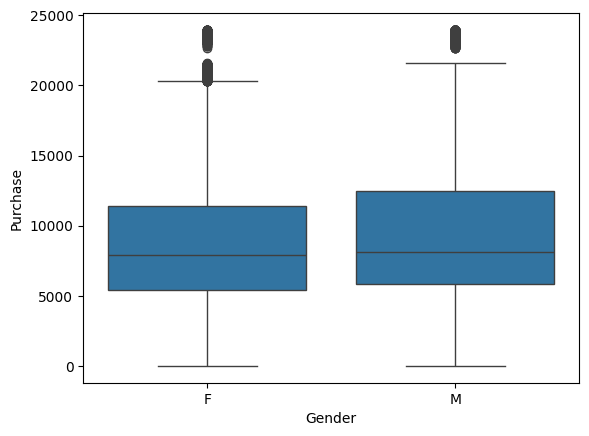

In [6]:
#Purchase by Gender & Age
#Compare spending across groups: Do males spend more than females? Do certain age groups purchase more?

sns.boxplot(x="Gender", y="Purchase", data=f)

<Axes: xlabel='Age', ylabel='Purchase'>

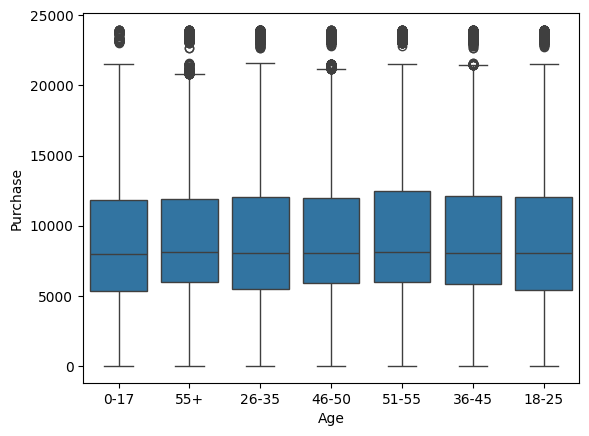

In [7]:
sns.boxplot(x="Age", y="Purchase", data=f)

<Axes: xlabel='City_Category', ylabel='Purchase'>

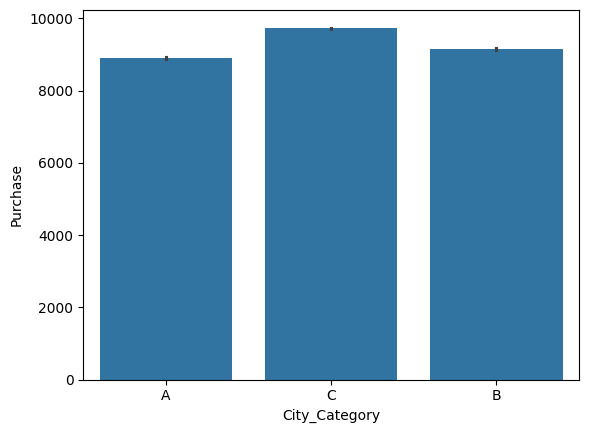

In [8]:
#This shows average purchase differences by geographical segments.

sns.barplot(x="City_Category", y="Purchase", estimator=np.mean, data=f)

<Axes: xlabel='Age', ylabel='Purchase'>

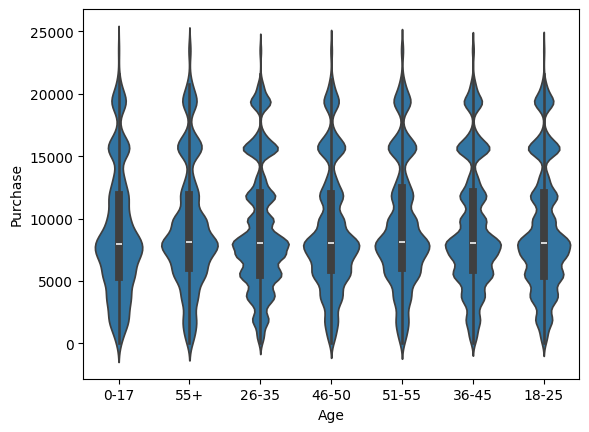

In [9]:
#Detect Trends, Patterns & Anomalies
#Shows if age groups have varying spread and central tendency in spending.

sns.violinplot(x="Age", y="Purchase", data=f)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

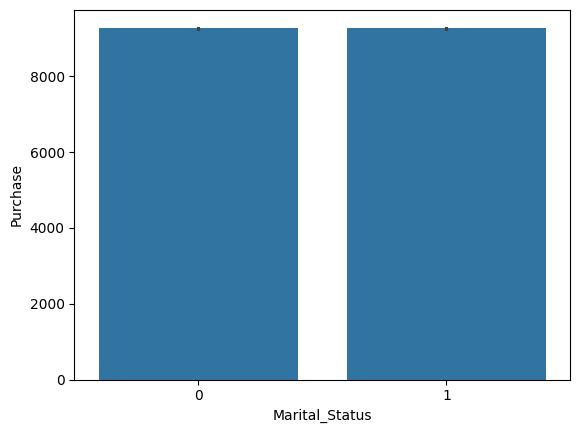

In [10]:
#This tests hypotheses: “Do single shoppers spend more?” Is marital status correlated with purchase amount?

sns.barplot(x="Marital_Status", y="Purchase", data=f)

In [11]:
#Check: Distribution of products. Which categories are most popular. How missing values are distributed (Product_Category_2 & Product_Category_3 often have missing values)

for col in ["Product_Category_1","Product_Category_2","Product_Category_3"]:
    print(f[col].value_counts()[:10])

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
Name: count, dtype: int64
Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
Name: count, dtype: int64
Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
Name: count, dtype: int64


In [12]:
#This tests hypotheses: “Men have higher average purchase than women.”
#Use a t-test to compare means: If the p-value < 0.05, the difference is statistically significant.

male = f[f["Gender"]=="M"]["Purchase"]
female = f[f["Gender"]=="F"]["Purchase"]

ttest_ind(male, female, nan_policy='omit')

TtestResult(statistic=np.float64(44.837957934353966), pvalue=np.float64(0.0), df=np.float64(550066.0))

In [13]:
#Missing Value Handling

f[["Product_Category_2","Product_Category_3"]].isnull().mean()

Product_Category_2    0.315666
Product_Category_3    0.696727
dtype: float64

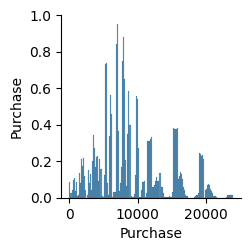

In [14]:
#Visualizing Key Patterns
#Pairplots. Look for: Relationships, Clusters, Outliers

sns.pairplot(f[["Purchase","Age","Stay_In_Current_City_Years"]])